In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda GeForce RTX 2070


# Build NN

In [3]:
import torch.nn as nn

In [4]:
MyNet = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
)


In [5]:
for name, param in MyNet.named_parameters():
  print(name, end=" ,")

0.weight ,0.bias ,2.weight ,2.bias ,4.weight ,4.bias ,6.weight ,6.bias ,

In [6]:
# save the initial model parameters of this un-trained NN
torch.save(MyNet.state_dict(), "InitialWeights.dat")

In [7]:
from torchsummary import summary
summary(MyNet, input_size=(10, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 10, 100]             200
              ReLU-2              [-1, 10, 100]               0
            Linear-3               [-1, 10, 50]           5,050
              ReLU-4               [-1, 10, 50]               0
            Linear-5               [-1, 10, 10]             510
              ReLU-6               [-1, 10, 10]               0
            Linear-7                [-1, 10, 1]              11
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.02
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [8]:
loss_func = torch.nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Generate data

In [10]:
import random
random.seed(a=42, version=2)
lstX = []
lstY = []
for x in range(-100, 100, 5):
    lstX.append([x])
    a=random.uniform(0,1)
    y = 3*x + a*100
    lstY.append([y])

In [11]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


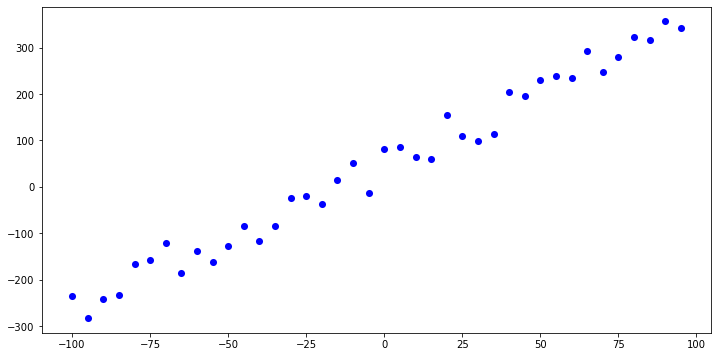

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(numpyX, numpyY, s=50, lw=0, color = "blue")
plt.show()

# Collect variance of model's predicting errors 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
lossLst = []
lossLst2 = []
for i in range(300):
    trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=42)
    tensorX = torch.FloatTensor(trainX).to(device)
    tensorY_hat = torch.FloatTensor(trainY_hat).to(device)
    if(i%20==0):
        print(i+1, end = " ,")
    MyNet.load_state_dict(torch.load('InitialWeights.dat')) #Use the same initial model parameters
    for epoch in range(1, 500):
        tensorY = MyNet(tensorX)
        loss = loss_func(tensorY_hat, tensorY)
        regularization_loss = 0
        for name, param in MyNet.named_parameters():
            if('weight' in name):
                regularization_loss += torch.sum(abs(param))
        
        loss = loss + 5 * regularization_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY, tensorY_hat)
    test_tensorX = torch.FloatTensor(testX).to(device)
    test_tensorY_hat = torch.FloatTensor(testY_hat).to(device)
    test_tensorY = MyNet(test_tensorX)
    loss2 = loss_func(test_tensorY, test_tensorY_hat)
    lossLst.append(float(loss))
    lossLst2.append(float(loss2))

1 ,21 ,41 ,61 ,81 ,101 ,121 ,141 ,161 ,181 ,201 ,221 ,241 ,261 ,281 ,

# Training Loss Plot

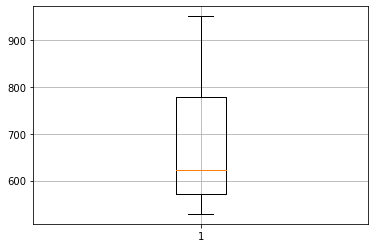

In [15]:
plt.boxplot(lossLst)
plt.grid()
plt.show()

# Testing Loss Plot

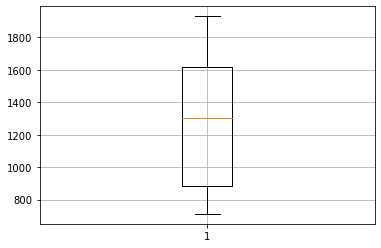

In [16]:
plt.boxplot(lossLst2)
plt.grid()
plt.show()